# K-Nearest Neighbours 

Definition:

<img src='https://curriculum-content.s3.amazonaws.com/data-science/images/knn.gif'>

## Distance Metrics:

<img src='https://curriculum-content.s3.amazonaws.com/data-science/images/knn_fs.png' width = "300">

<img src='https://curriculum-content.s3.amazonaws.com/data-science/images/manhattan_fs.png' width="300">

<img src='https://curriculum-content.s3.amazonaws.com/data-science/images/euclidean_fs.png' width = "200">

```python 
# Manhattan Distance is the sum of all side lengths to the first power
manhattan_distance = np.power((length_side_1**1 + length_side_2**1 + ... length_side_n**1), 1/1) 

# Euclidean Distance is the square root of the sum of all side lengths to the second power
euclidean_distance = np.power((length_side_1**2 + length_side_2**2 + ... length_side_n**2), 1/2)

# Minkowski Distance with a value of 3 would be the cube root of the sum of all side lengths to the third power
minkowski_distance_3 = np.power((length_side_1**3 + length_side_2**3 + ... length_side_n**3), 1/3)

# Minkowski Distance with a value of 5
minkowski_distance_5 = np.power((length_side_1**5 + length_side_2**5 + ... length_side_n**5), 1/5)
```

> **NOTE**: You'll often see Minkowski distance used as a parameter for any distance-based machine learning algorithms inside `sklearn`.

### KNN vs K-Means:

### Example:

In [47]:
# Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [48]:
# Load the Iris dataset
iris = sns.load_dataset('iris')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


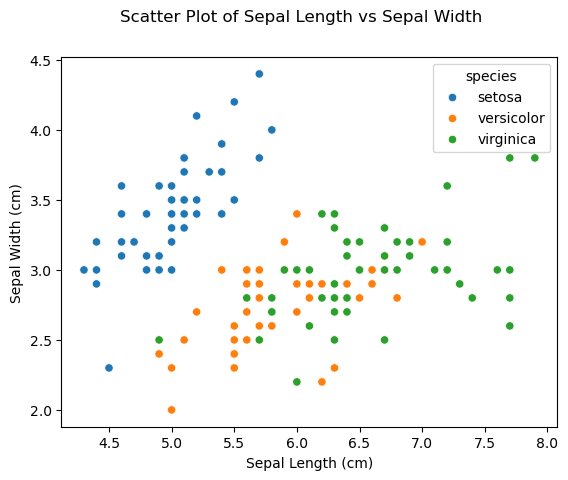

In [49]:
# Scatter plot to visualize the dataset
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris)
plt.suptitle("Scatter Plot of Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()


In [50]:
# Define features and target
X = iris.drop(columns='species')
y = iris['species']

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
# Initialize KNN model 
knn = KNeighborsClassifier()

# Fit the model to the training data
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [53]:
# Predict on the test set
y_pred = knn.predict(X_test_scaled)

In [54]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000


In [55]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


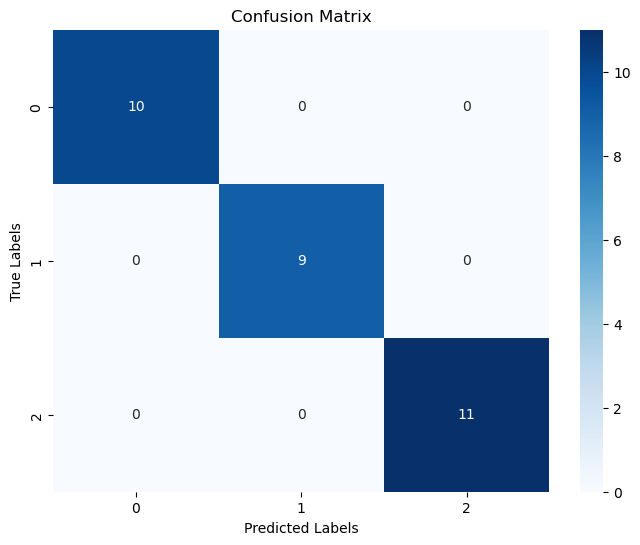

In [56]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [57]:
# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Optimal value of k: 3


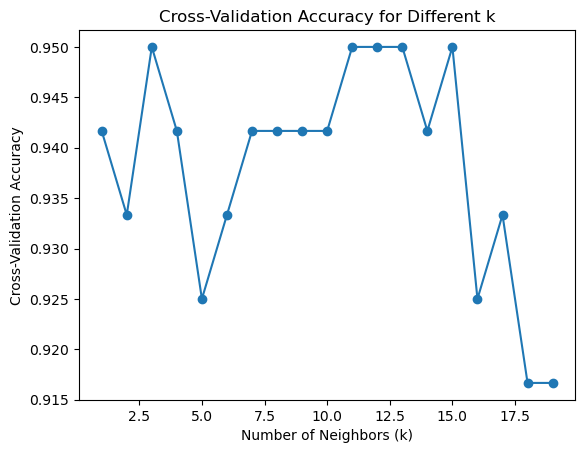

In [58]:
# Test different values of k using cross-validation
cv_scores = []
k_values = range(1, 20)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the value of k that gives the best accuracy
optimal_k = k_values[np.argmax(cv_scores)]
print(f"Optimal value of k: {optimal_k}")

# Plot the accuracy for different values of k
plt.plot(k_values, cv_scores, marker='o')
plt.title("Cross-Validation Accuracy for Different k")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-Validation Accuracy")
plt.show()

In [59]:
# Define the parameter grid
param_grid = {'n_neighbors': range(1, 20), 'weights': ['uniform', 'distance'], 'p': [1, 2]}

# Initialize GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")


Best Parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.96
